#### Normal Equation:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m =2000
X =np.random.rand(m, 1)
y =5 + 2*X + np.random.randn(m, 1)

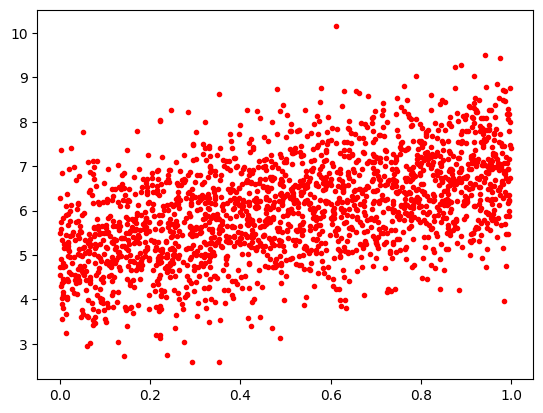

In [3]:
plt.plot(X, y, "r.")

In [4]:
from sklearn.preprocessing import add_dummy_feature

In [5]:
Xnew=add_dummy_feature(X)
theta_hat = np.linalg.inv(Xnew.T @ Xnew) @ Xnew.T @ y

In [6]:
theta_hat

array([[5.02957568],
       [1.98579066]])

In [7]:
X_test = np.array([[1.5], [2.5], [3.5]])
X_test =add_dummy_feature(X_test)
X_test @ theta_hat

array([[ 8.00826167],
       [ 9.99405234],
       [11.979843  ]])

In [8]:
X_test = np.array([[0], [1]])
X_test_new =add_dummy_feature(X_test)
y_pred = X_test_new @ theta_hat

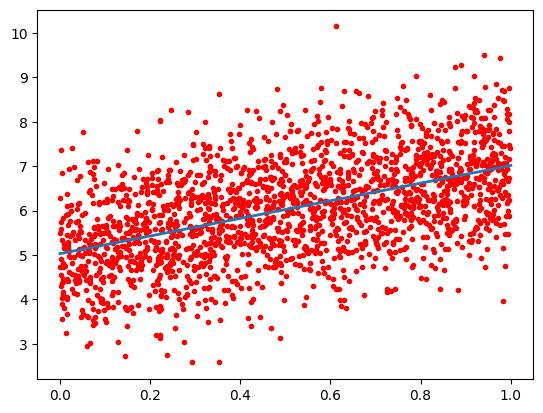

In [9]:
plt.plot(X, y, "r.")
plt.plot(X_test, y_pred, lw =2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr=LinearRegression()
lr.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
lr.intercept_, lr.coef_

(array([5.02957568]), array([[1.98579066]]))

In [13]:
lr.predict(X_test)

array([[5.02957568],
       [7.01536634]])

#### Bach Gradient Descent

In [14]:
m = Xnew.shape[0]
eta = 0.1


In [15]:
np.random.seed(40)
theta = np.random.randn(2, 1)


number_of_epochs = 1000

for epoch in range(number_of_epochs):
    grad_ = 2/m * Xnew.T @ (Xnew @ theta - y)
    theta = theta -eta * grad_

In [16]:
theta

array([[5.02957482],
       [1.98579225]])

#### Stochastic Gradient Descent

In [17]:
def learning_rate_schedule(t):
    t0, t1 = 2, 40
    return t0 / (t + t1)

In [18]:
np.random.seed(40)
theta = np.random.randn(2, 1)

number_of_epochs = 100

for epoch in range(number_of_epochs):
  for instance in range(m):
    random_index = np.random.randint(m)
    x_index = Xnew[random_index: random_index + 1]
    y_index = y[random_index: random_index + 1]
    grad_ = 2 * x_index.T @ (x_index @theta - y_index)
    eta = learning_rate_schedule(epoch * m + instance)
    theta = theta - eta * grad_

In [19]:
theta

array([[4.99624391],
       [2.050778  ]])

#### SGDRegressor

In [20]:
from sklearn.linear_model import SGDRegressor

In [27]:
sgd=SGDRegressor(max_iter=1000, tol=0.0001, early_stopping=True, n_iter_no_change=10, random_state=40,penalty=None)

In [23]:
X.shape

(2000, 1)

In [24]:
y.flatten().shape

(2000,)

In [29]:
sgd.fit(X, y.flatten())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.0001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,40


In [31]:
sgd.coef_

array([2.00098881])

In [32]:
sgd.intercept_

array([5.01066158])

#### Polynomial Regression

In [39]:
np.random.seed(40)
m = 1000
X = 4 * np.random.rand(m, 1) -4
y= 0.7 * X**2 + X + 3 + np.random.randn(m, 1)

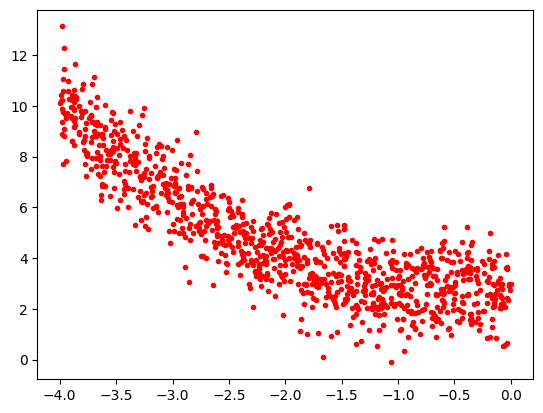

In [40]:
plt.plot(X, y, "r.")

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
polynomial_X = PolynomialFeatures(degree=2, include_bias=False)

In [49]:
X_polynomial = polynomial_X.fit_transform(X)

In [51]:
X_polynomial[0]

array([-2.36925189,  5.61335451])

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_polynomial, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
lin_reg.intercept_, lin_reg.coef_

(array([2.93644384]), array([[0.80227996, 0.65185857]]))

In [55]:
X_new = np.linspace(-4, 1, 1000).reshape(1000, 1)
X_new_polynomial = polynomial_X.transform(X_new)
y_new = lin_reg.predict(X_new_polynomial)

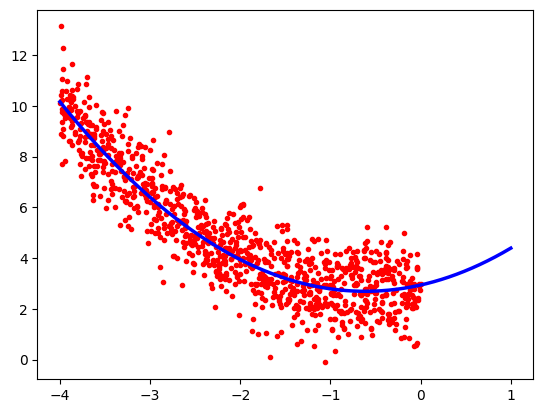

In [ ]:
plt.plot(X, y, "r.")
plt.plot(X_new, y_new, "b-", lw =2.5)

#### Learning Curve

In [57]:
from sklearn.model_selection import learning_curve

In [66]:
train_sizes, train_score, validation_score = learning_curve(
    LinearRegression(), X, y, 
    train_sizes=np.linspace(0.01, 1.0, 50),
    cv = 5,
    scoring= "neg_root_mean_squared_error"
)

In [67]:
train_error = -train_score.mean(axis =1)
validation_error = -validation_score.mean(axis =1)

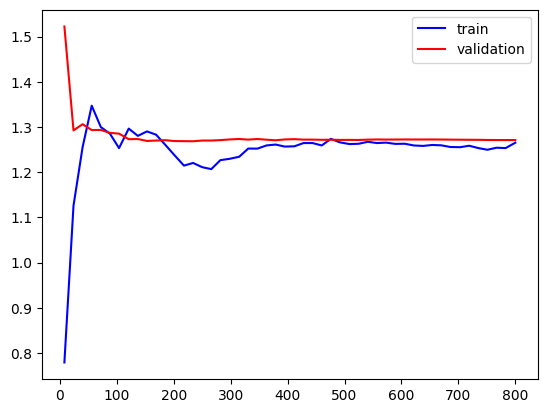

In [69]:
plt.plot(train_sizes, train_error, "b-", label="train")
plt.plot(train_sizes, validation_error, "r-", label = "validation")
plt.legend()